# What's! That! Digit!!!

<span style="color:#cc0000">Lomuto: </span>Ladies and gentlemen, we have an exciting show for you tonight; aspiring data scientist and amateur software engineer Michael Liu will be tacking the classic problem of identifying digits from their gray-scale pixel values!</span>

<span style="color:#0000cc">Hoare: </span>That's right, Lomuto! Each digit will be presented to the contestant as a 28x28 pixel image, with each pixel being represented by an integer between 0 and 255.

<span style="color:#cc0000">Lomuto: </span>But of course, the dataset file itself represents each image as a single 784-element row, plus one for the label, to make calculations a bit easier.

<span style="color:#0000cc">Hoare: </span>Though it would have been perfectly possible to preprocess that manually.

<span style="color:#cc0000">Lomuto: </span>Of course, of course,. But our audience tonight wants to see excitement, not mundane number processing.

<span style="color:#0000cc">Hoare: </span>And speaking of excitement, let's go ahead and see what Michael's first moves will be!

## Round 1: The Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

Using TensorFlow backend.


In [2]:
#import data
train_data = np.genfromtxt("train.csv", skip_header=1, delimiter=',', usecols=np.arange(1, 785))
train_labels = np.genfromtxt("train.csv", skip_header=1, delimiter=',', usecols=[0]).reshape((-1, 1))

num_classes = np.unique(train_labels).shape[0] # should be 10, for 10 digits
num_examples = train_data.shape[0]
num_features = train_data.shape[1]

print(str(num_examples) + " examples")
print(str(num_features) + " features")
print(str(num_classes) + " classes")

42000 examples
784 features
10 classes


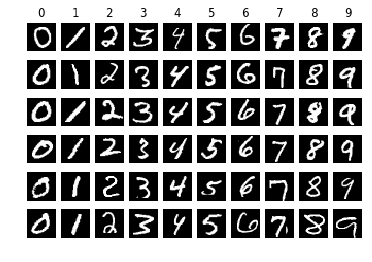

In [3]:
# display some example data
num_disp = 6 # number of examples to display per class
for label in range(0, num_classes):
    img_idxs = np.random.choice(np.where(train_labels==label)[0], num_disp, replace=False)
    for i, img_idx in enumerate(img_idxs):
        plt.subplot(num_disp, num_classes, i * num_classes + label + 1)
        plt.imshow(train_data[img_idx].reshape((28, 28)), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(label)
plt.show()

## Round 2: Preprocessing

In [4]:
train_data = np.array([image.reshape((1, 28, 28)) for image in train_data])
train_labels = to_categorical(train_labels, num_classes=10)

## Round 3: Training the Model

In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', data_format='channels_first', input_shape=(1, 28, 28)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(train_data, train_labels, epochs=5, batch_size=32)

Epoch 1/5
42000/42000 [==============================] - 108s - loss: 0.9677 - acc: 0.7757   
Epoch 2/5
42000/42000 [==============================] - 102s - loss: 0.2766 - acc: 0.9265   
Epoch 3/5
42000/42000 [==============================] - 103s - loss: 0.2325 - acc: 0.9414   
Epoch 4/5
42000/42000 [==============================] - 105s - loss: 0.2231 - acc: 0.9489   
Epoch 5/5
42000/42000 [==============================] - 102s - loss: 0.2166 - acc: 0.9498   


## Final Round: Testing the Model

In [7]:
test_data = np.array([image.reshape((1, 28, 28)) for image in np.genfromtxt("test.csv", skip_header=1, delimiter=',')])
ids = np.arange(1, test_data.shape[0] + 1).reshape((-1, 1))

In [8]:
test_predict = np.argmax(model.predict(test_data, batch_size=128), axis=1).reshape((-1, 1))

In [10]:
np.savetxt("submission.csv", np.hstack((ids, test_predict)), fmt='%.0f', header="ImageId,Label", delimiter=',', comments='')